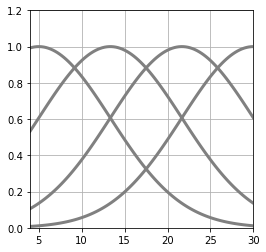

In [119]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# --- 리스트 5-2-(1)
# 데이터 로드 ----------------------------
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

# --- 리스트 5-2-(2)  # 가우스 함수 -----------
def gauss(x, mu, s):
    return  np.exp(-(x - mu)**2 / (2 * s**2))

# def gauss(x, mu, s):
#     return 1 / (1+ np.exp(-(x-mu)/(0.1*s**2)))
# 리스트 5-2-(3) # 메인 ---------------------
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0] # (A)
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


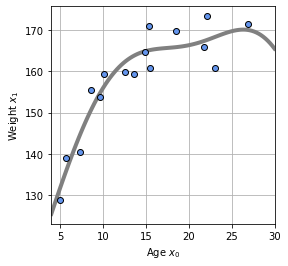

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# 리스트 5-2-(4)
# 선형 기저 함수 모델 ----------------
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

# 리스트 5-2-(5)
# 선형 기저 함수 모델 MSE ----------------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse


# 리스트 5-2-(6)
# 선형 기저 함수 모델 정확한 솔루션 -----------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s) 
    psi_T = np.transpose(psi)         
    b = np.linalg.inv(psi_T.dot(psi)) 
    c = b.dot(psi_T)                   
    w = c.dot(t)                        

    return w

# 리스트 5-2-(7) 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 

# 메인 ----------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)  # X : 나이, T; 키,  m: 가우스 함수를  4개 사용하여 기저함수로함
show_gauss_func(W)

plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.xlabel('Age $x_0$')
plt.ylabel('Weight $x_1$')
plt.show()

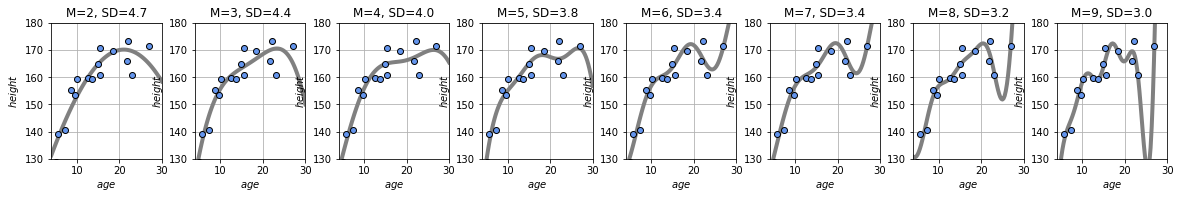

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 ----------------------------
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

# 리스트 5-2-(8)
plt.figure(figsize=(20, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 3, 4, 5, 6, 7, 8, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
    plt.xlabel('$age$')
    plt.ylabel('$height$')
plt.show()

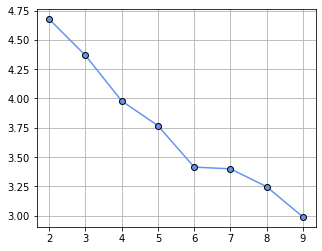

In [122]:
# 리스트 5-2-(9)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()

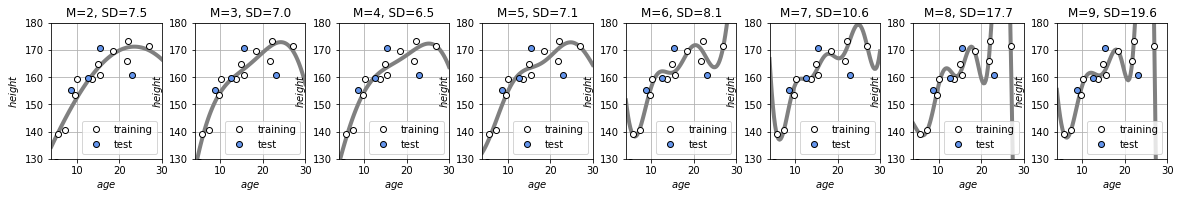

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# 리스트 5-2-(10) 훈련 데이터와 테스트 데이터 ------------------
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]
# 메인 ------------------------------------
plt.figure(figsize=(20, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 3, 4, 5, 6, 7, 8, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',  linestyle='None', color='white', \
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None', color='cornflowerblue', \
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
    plt.xlabel('$age$')
    plt.ylabel('$height$')
plt.show()

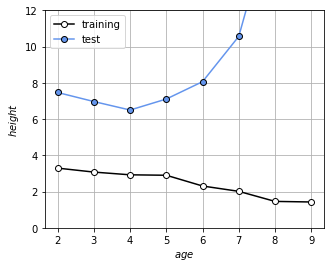

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 ----------------------------
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

# 리스트 5-2-(10) 훈련 데이터와 테스트 데이터 ------------------
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]


# 리스트 5-2-(11)
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M)) 
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-',   markerfacecolor='white', \
         markeredgecolor='black', color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-', color='cornflowerblue', \
         markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.xlabel('$age$')
plt.ylabel('$height$')
plt.show()